# 1. Análise Exploratória de Dados

In [2]:
#importando as principais bibliotecas 

import pandas as pd 

import seaborn as sns 
import matplotlib.pyplot as plt

from shapely.geometry import Point
import geopandas as gpd

In [4]:
#efetuando a importação dos dados

df_eleitoral = pd.read_csv(r'C:\Users\cesar\Downloads\projeto_eleicao_2022\perfil_eleitorado_2022\perfil_eleitor_secao_2022_BA.csv', sep=";", encoding="latin-1" )


In [5]:
#visualizando as primeiras linhas

df_eleitoral.head(10)

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,SG_UF,CD_MUNICIPIO,NM_MUNICIPIO,CD_MUN_SIT_BIOMETRICA,DS_MUN_SIT_BIOMETRICA,NR_ZONA,NR_SECAO,...,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_FAIXA_ETARIA,DS_FAIXA_ETARIA,CD_GRAU_ESCOLARIDADE,DS_GRAU_ESCOLARIDADE,QT_ELEITORES_PERFIL,QT_ELEITORES_BIOMETRIA,QT_ELEITORES_DEFICIENCIA,QT_ELEITORES_INC_NM_SOCIAL
0,12/07/2022,08:31:45,2022,BA,39411,UBAÍRA,1,Biométrico,38,111,...,1,SOLTEIRO,5054,50 a 54 anos,4,ENSINO FUNDAMENTAL COMPLETO,1,0,0,0
1,12/07/2022,08:31:45,2022,BA,39411,UBAÍRA,1,Biométrico,38,111,...,1,SOLTEIRO,5559,55 a 59 anos,1,ANALFABETO,2,2,0,0
2,12/07/2022,08:31:45,2022,BA,39411,UBAÍRA,1,Biométrico,38,111,...,1,SOLTEIRO,5559,55 a 59 anos,2,LÊ E ESCREVE,3,3,0,0
3,12/07/2022,08:31:45,2022,BA,39411,UBAÍRA,1,Biométrico,38,111,...,1,SOLTEIRO,5559,55 a 59 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,1,1,0,0
4,12/07/2022,08:31:45,2022,BA,39411,UBAÍRA,1,Biométrico,38,111,...,1,SOLTEIRO,6064,60 a 64 anos,1,ANALFABETO,2,2,0,0
5,12/07/2022,08:31:45,2022,BA,39411,UBAÍRA,1,Biométrico,38,111,...,1,SOLTEIRO,6064,60 a 64 anos,2,LÊ E ESCREVE,3,2,0,0
6,12/07/2022,08:31:45,2022,BA,39411,UBAÍRA,1,Biométrico,38,111,...,1,SOLTEIRO,6064,60 a 64 anos,3,ENSINO FUNDAMENTAL INCOMPLETO,1,0,0,0
7,12/07/2022,08:31:45,2022,BA,39411,UBAÍRA,1,Biométrico,38,111,...,1,SOLTEIRO,6569,65 a 69 anos,1,ANALFABETO,2,2,0,0
8,12/07/2022,08:31:45,2022,BA,39411,UBAÍRA,1,Biométrico,38,111,...,1,SOLTEIRO,6569,65 a 69 anos,2,LÊ E ESCREVE,1,1,0,0
9,12/07/2022,08:31:45,2022,BA,39411,UBAÍRA,1,Biométrico,38,111,...,1,SOLTEIRO,7074,70 a 74 anos,1,ANALFABETO,1,0,0,0


In [89]:
#verificando o número de linhas e colunas

df_eleitoral.shape

(5499206, 23)

In [90]:
#principais informações do dataset

df_eleitoral.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5499206 entries, 0 to 5499205
Data columns (total 23 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   DT_GERACAO                  object
 1   HH_GERACAO                  object
 2   ANO_ELEICAO                 int64 
 3   SG_UF                       object
 4   CD_MUNICIPIO                int64 
 5   NM_MUNICIPIO                object
 6   CD_MUN_SIT_BIOMETRICA       int64 
 7   DS_MUN_SIT_BIOMETRICA       object
 8   NR_ZONA                     int64 
 9   NR_SECAO                    int64 
 10  NR_LOCAL_VOTACAO            int64 
 11  CD_GENERO                   int64 
 12  DS_GENERO                   object
 13  CD_ESTADO_CIVIL             int64 
 14  DS_ESTADO_CIVIL             object
 15  CD_FAIXA_ETARIA             int64 
 16  DS_FAIXA_ETARIA             object
 17  CD_GRAU_ESCOLARIDADE        int64 
 18  DS_GRAU_ESCOLARIDADE        object
 19  QT_ELEITORES_PERFIL         int64 
 20  QT

In [91]:
#criando função para visualizar os valores únicos e/ou nulos por colunas

def valores_unicos(df):

    import pandas as pd

    for colunas in df.columns:
        print(f'Coluna {colunas}:')
        contar_valores = df[colunas].value_counts(dropna=False)
        porcentagem_valores = df[colunas].value_counts(dropna=False, normalize=True) * 100
        resultado_valores = pd.concat([contar_valores, porcentagem_valores], axis=1, 
                                     keys=['Qnt', 'Porcentagem'])
        print(resultado_valores)

        print(f'Valores nulos: {df[colunas].isnull().sum()}')
        print('\n')

valores_unicos(df_eleitoral)

Coluna DT_GERACAO:
                Qnt  Porcentagem
DT_GERACAO                      
12/07/2022  5499206        100.0
Valores nulos: 0


Coluna HH_GERACAO:
                Qnt  Porcentagem
HH_GERACAO                      
08:31:45    5499206        100.0
Valores nulos: 0


Coluna ANO_ELEICAO:
                 Qnt  Porcentagem
ANO_ELEICAO                      
2022         5499206        100.0
Valores nulos: 0


Coluna SG_UF:
           Qnt  Porcentagem
SG_UF                      
BA     5499206        100.0
Valores nulos: 0


Coluna CD_MUNICIPIO:
                 Qnt  Porcentagem
CD_MUNICIPIO                     
38490         856334    15.571957
35157         201057     3.656110
39659         123998     2.254835
34134          84643     1.539186
35971          81980     1.490761
...              ...          ...
34894           2279     0.041442
35530           2102     0.038224
34479           2069     0.037624
36757           2035     0.037005
36811           1961     0.035660

[417

In [92]:
#criando função para gerar gráfico em barras para a visualização dos valores por coluna

def visualizar_barras (coluna, df):

    contar_valores = df[coluna].value_counts(dropna=False)
    contar_valores.plot(kind='bar')
    plt.title(f'Dados referentes a coluna: {coluna}')
    plt.xlabel(coluna)
    plt.show()

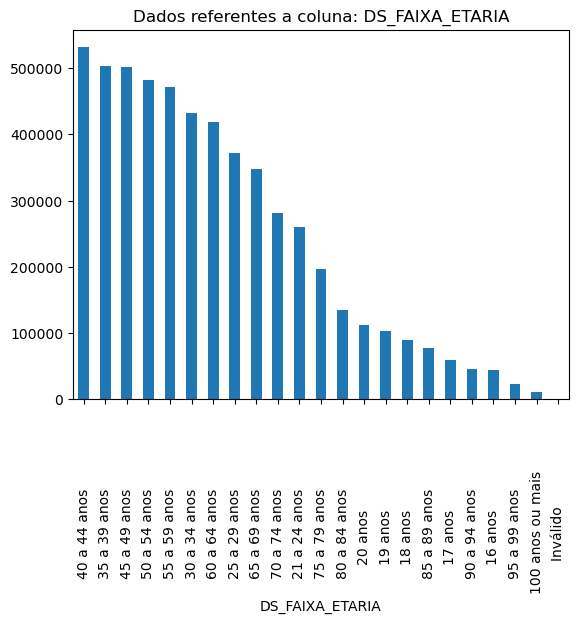

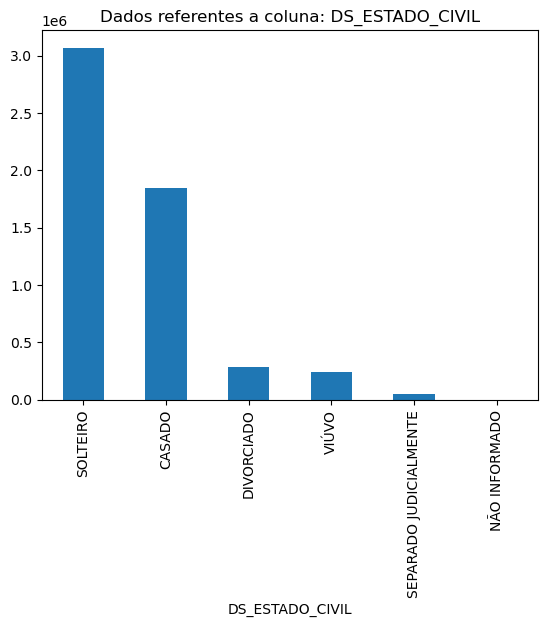

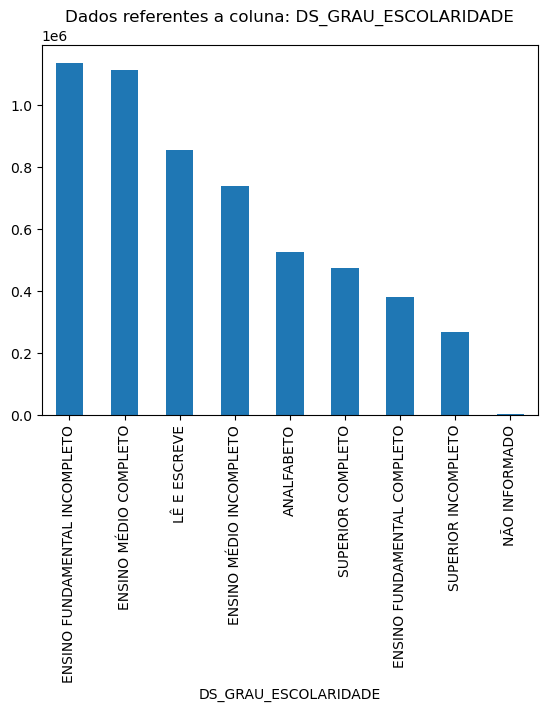

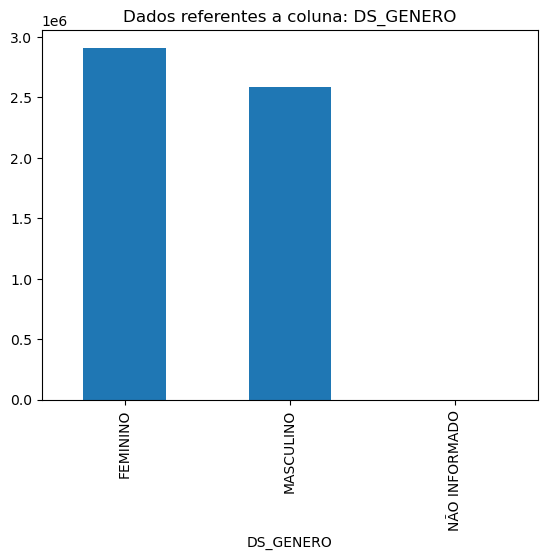

In [93]:
#visualizando colunas com a função visualizar_barras

visualizar_barras('DS_FAIXA_ETARIA', df_eleitoral)
visualizar_barras('DS_ESTADO_CIVIL', df_eleitoral)
visualizar_barras('DS_GRAU_ESCOLARIDADE', df_eleitoral)
visualizar_barras('DS_GENERO', df_eleitoral)

### 1.1 Tratando dataframe eleitoral

In [94]:
#criando uma cópia do dataframe antes do tratamento 

df_tratado = df_eleitoral.copy()


In [95]:
#tratando os valores nulos (#NULO, #NE, -1 ou -3, assim como descrito no material do TSE)

df_tratado.replace({'#NULO': None, '#NE': None, '-1': None, '-3': None}, inplace= True)

In [96]:
print(df_tratado.head(5))

   DT_GERACAO HH_GERACAO  ANO_ELEICAO SG_UF  CD_MUNICIPIO NM_MUNICIPIO  \
0  12/07/2022   08:31:45         2022    BA         39411       UBAÍRA   
1  12/07/2022   08:31:45         2022    BA         39411       UBAÍRA   
2  12/07/2022   08:31:45         2022    BA         39411       UBAÍRA   
3  12/07/2022   08:31:45         2022    BA         39411       UBAÍRA   
4  12/07/2022   08:31:45         2022    BA         39411       UBAÍRA   

   CD_MUN_SIT_BIOMETRICA DS_MUN_SIT_BIOMETRICA  NR_ZONA  NR_SECAO  ...  \
0                      1            Biométrico       38       111  ...   
1                      1            Biométrico       38       111  ...   
2                      1            Biométrico       38       111  ...   
3                      1            Biométrico       38       111  ...   
4                      1            Biométrico       38       111  ...   

   CD_ESTADO_CIVIL  DS_ESTADO_CIVIL CD_FAIXA_ETARIA  \
0                1         SOLTEIRO            5054   


In [97]:
#visualizando dados do nosso arquivo SHP que contém dados geoespaciais da divisão político-administrativa da bahia

df_geoespacial = gpd.read_file(r'C:\Users\cesar\Downloads\projeto_eleicao_2022\DIVISAO_POLITICO_ADMINISTRATIVA_2017_06_14\DPA_A_100K_2017_06_14_GCS_SIR_SEI.shp')

print(df_geoespacial.head(5))

     MUNICIPIO   Codigo                                           geometry
0  Nova Viçosa  2923001  POLYGON ((-39.70855 -17.77303, -39.70812 -17.7...
1       Mucuri  2922003  POLYGON ((-40.21221 -17.73048, -40.21085 -17.7...
2     Ibirapoã  2912806  POLYGON ((-40.14385 -17.62265, -40.14350 -17.6...
3    Caravelas  2906907  POLYGON ((-40.22508 -17.40671, -40.22353 -17.4...
4      Lajedão  2918902  POLYGON ((-40.32401 -17.39604, -40.32253 -17.3...


In [98]:
valores_unicos(df_tratado)

valores_unicos(df_geoespacial)

Coluna DT_GERACAO:
                Qnt  Porcentagem
DT_GERACAO                      
12/07/2022  5499206        100.0
Valores nulos: 0


Coluna HH_GERACAO:
                Qnt  Porcentagem
HH_GERACAO                      
08:31:45    5499206        100.0
Valores nulos: 0


Coluna ANO_ELEICAO:
                 Qnt  Porcentagem
ANO_ELEICAO                      
2022         5499206        100.0
Valores nulos: 0


Coluna SG_UF:
           Qnt  Porcentagem
SG_UF                      
BA     5499206        100.0
Valores nulos: 0


Coluna CD_MUNICIPIO:
                 Qnt  Porcentagem
CD_MUNICIPIO                     
38490         856334    15.571957
35157         201057     3.656110
39659         123998     2.254835
34134          84643     1.539186
35971          81980     1.490761
...              ...          ...
34894           2279     0.041442
35530           2102     0.038224
34479           2069     0.037624
36757           2035     0.037005
36811           1961     0.035660

[417

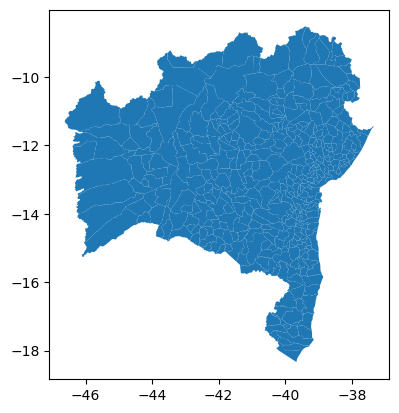

In [99]:
df_geoespacial.plot()

plt.show()

In [100]:
#verificando valores únicos do df_mapa

valores_unicos(df_geoespacial)

Coluna MUNICIPIO:
                     Qnt  Porcentagem
MUNICIPIO                            
Nova Viçosa            1     0.239808
Nova Redenção          1     0.239808
Angical                1     0.239808
Candeal                1     0.239808
Bonito                 1     0.239808
...                  ...          ...
Barra da Estiva        1     0.239808
Taperoá                1     0.239808
Wenceslau Guimarães    1     0.239808
Coribe                 1     0.239808
Curaçá                 1     0.239808

[417 rows x 2 columns]
Valores nulos: 0


Coluna Codigo:
         Qnt  Porcentagem
Codigo                   
2923001    1     0.239808
2922854    1     0.239808
2901403    1     0.239808
2906402    1     0.239808
2904050    1     0.239808
...      ...          ...
2902807    1     0.239808
2931202    1     0.239808
2933505    1     0.239808
2909109    1     0.239808
2909901    1     0.239808

[417 rows x 2 columns]
Valores nulos: 0


Coluna geometry:
                                

In [101]:
#verificando as colunas de ambos os dataframes 

print(df_tratado.columns)

print()

print(df_geoespacial.columns)

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'SG_UF', 'CD_MUNICIPIO',
       'NM_MUNICIPIO', 'CD_MUN_SIT_BIOMETRICA', 'DS_MUN_SIT_BIOMETRICA',
       'NR_ZONA', 'NR_SECAO', 'NR_LOCAL_VOTACAO', 'CD_GENERO', 'DS_GENERO',
       'CD_ESTADO_CIVIL', 'DS_ESTADO_CIVIL', 'CD_FAIXA_ETARIA',
       'DS_FAIXA_ETARIA', 'CD_GRAU_ESCOLARIDADE', 'DS_GRAU_ESCOLARIDADE',
       'QT_ELEITORES_PERFIL', 'QT_ELEITORES_BIOMETRIA',
       'QT_ELEITORES_DEFICIENCIA', 'QT_ELEITORES_INC_NM_SOCIAL'],
      dtype='object')

Index(['MUNICIPIO', 'Codigo', 'geometry'], dtype='object')


In [102]:
#verificando o tipo de variáveis em cada coluna para unir os dois dataframes (df_mapa e df_tratado)

df_tratado.info()

print()

df_geoespacial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5499206 entries, 0 to 5499205
Data columns (total 23 columns):
 #   Column                      Dtype 
---  ------                      ----- 
 0   DT_GERACAO                  object
 1   HH_GERACAO                  object
 2   ANO_ELEICAO                 int64 
 3   SG_UF                       object
 4   CD_MUNICIPIO                int64 
 5   NM_MUNICIPIO                object
 6   CD_MUN_SIT_BIOMETRICA       int64 
 7   DS_MUN_SIT_BIOMETRICA       object
 8   NR_ZONA                     int64 
 9   NR_SECAO                    int64 
 10  NR_LOCAL_VOTACAO            int64 
 11  CD_GENERO                   int64 
 12  DS_GENERO                   object
 13  CD_ESTADO_CIVIL             int64 
 14  DS_ESTADO_CIVIL             object
 15  CD_FAIXA_ETARIA             int64 
 16  DS_FAIXA_ETARIA             object
 17  CD_GRAU_ESCOLARIDADE        int64 
 18  DS_GRAU_ESCOLARIDADE        object
 19  QT_ELEITORES_PERFIL         int64 
 20  QT

In [103]:
#Tratando os dataframes antes de os unir em um GeoDataFrame

df_tratado['NM_MUNICIPIO'] = df_tratado['NM_MUNICIPIO'].str.upper()
df_geoespacial['MUNICIPIO'] = df_geoespacial['MUNICIPIO'].str.upper()

#df_geoespacial['geometry'] = df_geoespacial['geometry'].simplify(tolerance=0.1)

In [104]:
# Fazer a groupby para calcular a média das idades por município
df_media_idade = df_tratado.groupby('NM_MUNICIPIO')['CD_FAIXA_ETARIA'].mean().reset_index()
df_media_idade.rename(columns={'CD_FAIXA_ETARIA': 'media_idade'}, inplace=True)

# Unir com o DataFrame geoespacial
"""df_mapa_media_idade = pd.merge(df_geoespacial, df_media_idade, 
                               left_on='MUNICIPIO', right_on='NM_MUNICIPIO', how='left')

# Plotar o mapa temático
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
df_mapa_media_idade.plot(column='media_idade', cmap='Blues', legend=True, ax=ax)
plt.title('Média de Idade por Município na Bahia')
plt.show()"""


"df_mapa_media_idade = pd.merge(df_geoespacial, df_media_idade, \n                               left_on='MUNICIPIO', right_on='NM_MUNICIPIO', how='left')\n\n# Plotar o mapa temático\nfig, ax = plt.subplots(1, 1, figsize=(12, 8))\ndf_mapa_media_idade.plot(column='media_idade', cmap='Blues', legend=True, ax=ax)\nplt.title('Média de Idade por Município na Bahia')\nplt.show()"

In [105]:
# Unir o df_mapa ao df_tratado, gerando ao final um arquivo GeoDataFrame

df_ba_media_idade = pd.merge(df_media_idade, df_geoespacial, how='left', left_on='NM_MUNICIPIO', right_on='MUNICIPIO')

df_ba_media_idade = gpd.GeoDataFrame(df_ba_media_idade, geometry='geometry')


print(df_ba_media_idade.head(5))

  NM_MUNICIPIO  media_idade  MUNICIPIO   Codigo  \
0        ABARÉ  4520.546537      ABARÉ  2900207   
1       ABAÍRA  4983.002012     ABAÍRA  2900108   
2    ACAJUTIBA  4719.143713  ACAJUTIBA  2900306   
3     ADUSTINA  4607.335223   ADUSTINA  2900355   
4      AIQUARA  4779.973322    AIQUARA  2900603   

                                            geometry  
0  POLYGON ((-39.35347 -8.54508, -39.34996 -8.548...  
1  POLYGON ((-41.65334 -13.16869, -41.65311 -13.1...  
2  POLYGON ((-38.04970 -11.58322, -38.04949 -11.5...  
3  POLYGON ((-37.99556 -10.43288, -37.99529 -10.4...  
4  POLYGON ((-39.86975 -14.01162, -39.86732 -14.0...  


In [106]:
#observando se a qnt de linhas e colunas condizem com o resultado esperado da união do df_eleitoral com o df_geoespacial
"""df_bahia.shape"""

'df_bahia.shape'

In [107]:
# Remover espaços em branco nos rótulos da coluna DS_FAIXA_ETARIA
"""df_bahia['DS_FAIXA_ETARIA'] = df_bahia['DS_FAIXA_ETARIA'].str.strip()

# Imprimir novamente para verificar
print("Valores únicos em DS_FAIXA_ETARIA:")
print(df_bahia['DS_FAIXA_ETARIA'].unique())
print("\nContagem de valores em DS_FAIXA_ETARIA:")
print(df_bahia['DS_FAIXA_ETARIA'].value_counts())"""


'df_bahia[\'DS_FAIXA_ETARIA\'] = df_bahia[\'DS_FAIXA_ETARIA\'].str.strip()\n\n# Imprimir novamente para verificar\nprint("Valores únicos em DS_FAIXA_ETARIA:")\nprint(df_bahia[\'DS_FAIXA_ETARIA\'].unique())\nprint("\nContagem de valores em DS_FAIXA_ETARIA:")\nprint(df_bahia[\'DS_FAIXA_ETARIA\'].value_counts())'

In [108]:
#criando o dataframe teste com os 300 mil primeiras linhas do nosso df_bahia

#df_teste = df_bahia.head(100000).copy()



In [109]:
"""fig, ax = plt.subplots(1, 1, figsize=(10, 16))
df_teste.plot(column='DS_FAIXA_ETARIA', cmap='viridis', legend=True, ax=ax)
plt.title('Dados referentes à faixa etária dos eleitores baianos em 2022')
plt.show()"""

"fig, ax = plt.subplots(1, 1, figsize=(10, 16))\ndf_teste.plot(column='DS_FAIXA_ETARIA', cmap='viridis', legend=True, ax=ax)\nplt.title('Dados referentes à faixa etária dos eleitores baianos em 2022')\nplt.show()"

In [110]:
def grafico_geoespacial(dataframe, coluna='DS_FAIXA_ETARIA', figsize=(12, 22), cmap='Blue'):
    
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    dataframe.plot(column=coluna, cmap=cmap, legend=True, ax=ax)
    
    legenda_mapa = ax.get_legend()

    #if criado devido a problemas na definação da legenda.
    if legenda_mapa is not None:
        legenda_mapa.set_bbox_to_anchor((1.20, 0.8))  #bbox_to_anchor define o eixo x e y para a legenda
        legenda_mapa.set_title(coluna) #set_title vai definir o título da legenda
        legenda_mapa.set_frame_on(True) #set_frame_on vai remover a moldura da legenda

    plt.title(f'Dados referentes à {coluna} dos eleitores baianos em 2022')

    plt.show()

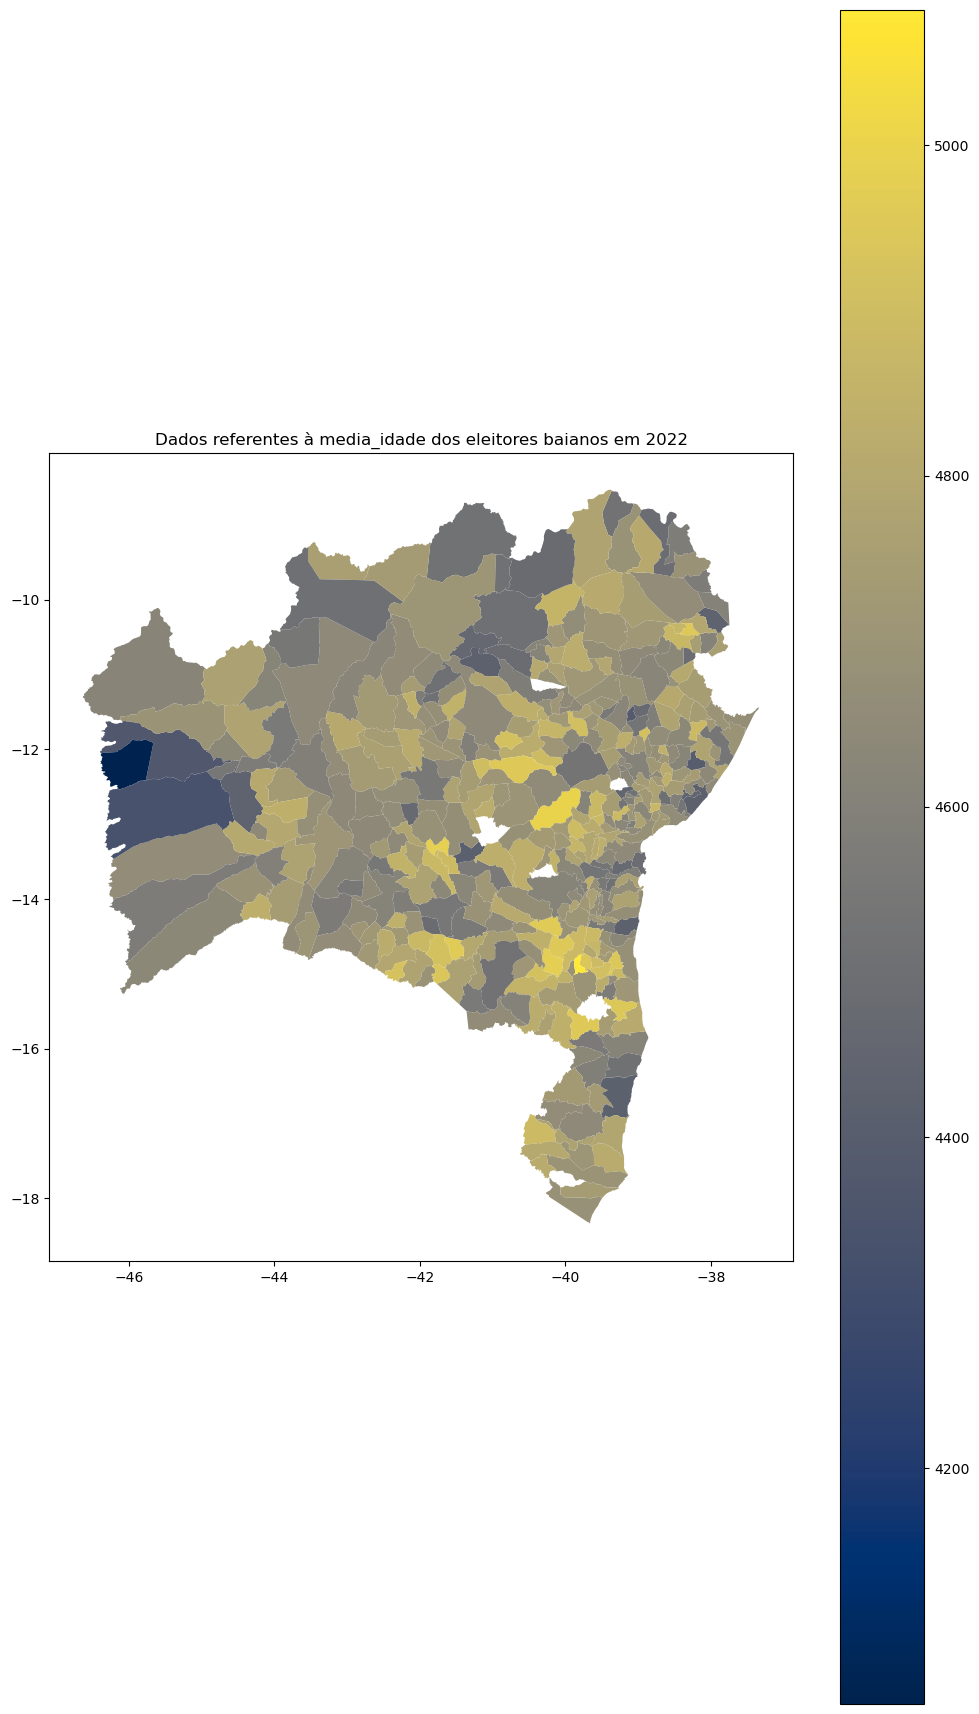

In [111]:
#visualizando o df_media_idade

grafico_geoespacial(df_ba_media_idade, coluna='media_idade', cmap='cividis')